This small project imvolves the analysis of review by three different sources: Rotten Tomatoes, IMDB, Metacritic and Fandango. The dataset was put together to help detect bias in the movie review sites by FiveThrityEight. Looking at the dataset, we notice that there are two types of scores provided: by users and by critics. This detail might help us in uncovering of any biases in the reviews. Each source has different scale of ratings, which means we will have to use normalized columns. 

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv")
print(df.head(5))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

Let's use some simple matplotlib functions to get visualizations:

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

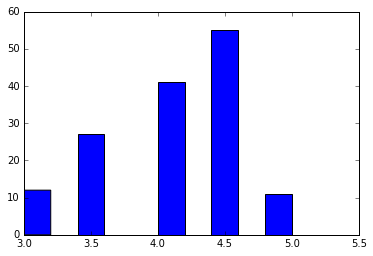

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df["Fandango_Stars"])

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

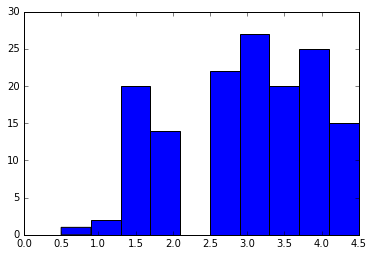

In [5]:
plt.hist(df["Metacritic_norm_round"])

There are noticable differences in the Fandango and Metacritic scores; to quantify these differences - or to find out how different they are - we can find mean, median and the standard deviation. 

In [5]:
import numpy
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv")

f_mean = df["Fandango_Stars"].mean()
m_mean = df["Metacritic_norm_round"].mean()
f_std = df["Fandango_Stars"].std()
m_std = df["Metacritic_norm_round"].std()
f_median = df["Fandango_Stars"].median()
m_median = df["Metacritic_norm_round"].median()

print(f_mean)
print(m_mean)
print(f_std)
print(m_std)
print(f_median)
print(m_median)

4.089041095890411
2.9726027397260273
0.5403859779787333
0.9909605613743364
4.0
3.0


The median metacritic score is higher than the mean metacritic score; and the median fandango score is lower than the mean fandango score. Such variations occur due to sudden increases or decreases in the ratings; thus, for example, there are a few but very high ratings in Metacritic scores that pull the mean up. At the same time, there are a few but very low Fandango scores that push the median down.

To find the movies with the largest differences between their Metacritic and Fandango ratings:

In [7]:
df["fm_diff"] = numpy.abs(df["Metacritic_norm_round"] - df["Fandango_Stars"])
df.sort_values(by="fm_diff", ascending=False).head(5)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


We can also build a scatterplot to visualize the movies that appear to be "outliers" due to their higher ratings.


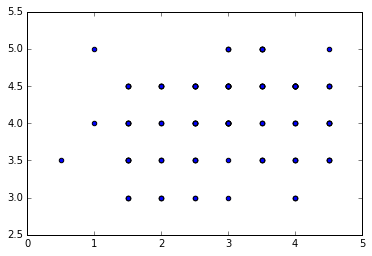

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["Metacritic_norm_round"], df["Fandango_Stars"])


Fandango ratings appear clustered between 3 and 5, while Metacritic ratings go from 0 to 5. In general, Fandango ratings in general appear to be higher than metacritic ratings. As we can see from scatterplot, some outliers have, for example, a 5.0 rating by Metacritic while a 1 rating given by Fandango.

To figure out how different the Fandango scores are from those of Metacritic, we can rely on correlation:

In [11]:
from scipy.stats import pearsonr
r_value, p_value = pearsonr(df["Fandango_Stars"], df["Metacritic_norm_round"])
print(r_value)

0.178449190739


The result we get (0.178449190739) is pretty low, which tells us about the small similarity between the two sets of scores. To demonstrate that in other way, we can use the linear regression and find out what score would a movie get in Fandango if it has a 3.0 in Metacritic:  

In [13]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(df["Metacritic_norm_round"], df["Fandango_Stars"])
pred = 3 * slope + intercept
print(pred)

4.09170715282


To create a visual representation of the linear regression, we can use a residual plot:

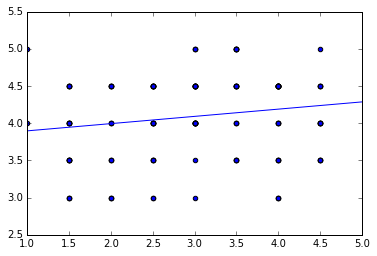

In [14]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(df["Metacritic_norm_round"], df["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()